# NON-LINEAR REGRESSION MODELS

In [2]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

# knn

In [3]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [4]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [5]:
knn_model

KNeighborsRegressor()

In [6]:
knn_model.n_neighbors

5

In [7]:
knn_model.effective_metric_

'euclidean'

In [8]:
y_pred = knn_model.predict(X_test)

In [9]:
np.sqrt(mean_squared_error(y_test, y_pred))

426.6570764525201

In [10]:
RMSE = [] 

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)


k = 1 için RMSE değeri:  0.0
k = 2 için RMSE değeri:  179.52761335480352
k = 3 için RMSE değeri:  205.20157172291863
k = 4 için RMSE değeri:  220.5139794876305
k = 5 için RMSE değeri:  239.64671325413764
k = 6 için RMSE değeri:  243.5904190007242
k = 7 için RMSE değeri:  258.1478781634636
k = 8 için RMSE değeri:  266.05374203349805
k = 9 için RMSE değeri:  269.73782093553376
k = 10 için RMSE değeri:  271.2798300436963


In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
knn_params = {'n_neighbors': np.arange(1,30,1)}

In [13]:
knn = KNeighborsRegressor()

In [14]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)

In [15]:
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [16]:
knn_cv_model.best_params_["n_neighbors"]

8

In [17]:
RMSE = [] 
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse) 
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )

k = 1 için RMSE değeri:  0.0 RMSE_CV değeri:  325.39475147063825
k = 2 için RMSE değeri:  179.52761335480352 RMSE_CV değeri:  293.24000183333817
k = 3 için RMSE değeri:  205.20157172291863 RMSE_CV değeri:  283.7486667487823
k = 4 için RMSE değeri:  220.5139794876305 RMSE_CV değeri:  286.3240222024089
k = 5 için RMSE değeri:  239.64671325413764 RMSE_CV değeri:  290.0705466132226
k = 6 için RMSE değeri:  243.5904190007242 RMSE_CV değeri:  298.1263115575851
k = 7 için RMSE değeri:  258.1478781634636 RMSE_CV değeri:  294.77070479194987
k = 8 için RMSE değeri:  266.05374203349805 RMSE_CV değeri:  291.98672028891235
k = 9 için RMSE değeri:  269.73782093553376 RMSE_CV değeri:  295.7162739573105
k = 10 için RMSE değeri:  271.2798300436963 RMSE_CV değeri:  301.31047022701154


In [18]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [19]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [20]:
from sklearn.svm import SVR

In [21]:
svr_model = SVR("linear").fit(X_train, y_train)

In [22]:
svr_model.predict(X_train)[0:5]

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756])

In [23]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], 
                                svr_model.coef_[0][0])) 

y = -48.69756097561513 + 4.969512195122093 x


In [24]:
X_train["Hits"][0:1]

183    91.0
Name: Hits, dtype: float64

In [25]:
-48.69756097561513 + 4.969512195122093*91

403.5280487804953

In [26]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])

In [27]:
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [28]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

471.4688377768768

# SVR

In [29]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [30]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [31]:
from sklearn.svm import SVR

In [32]:
svr_model = SVR("linear").fit(X_train, y_train)

In [33]:
svr_model.predict(X_train)[0:5]

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756])

In [34]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], 
                                svr_model.coef_[0][0])) 

y = -48.69756097561513 + 4.969512195122093 x


In [35]:
X_train["Hits"][0:1]

183    91.0
Name: Hits, dtype: float64

In [36]:
-48.69756097561513 + 4.969512195122093*91

403.5280487804953

In [37]:
y_pred = svr_model.predict(X_train)

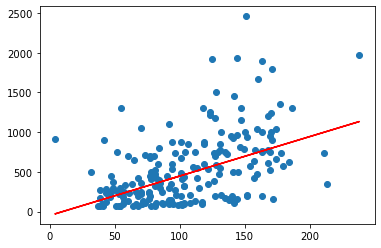

In [38]:
plt.scatter(X_train, y_train)
plt.plot(X_train,y_pred, color = "r")

In [39]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred  = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

y = -8.814095480334572 + 5.1724561354706875 x


In [40]:
-8.814095480334572 + 5.1724561354706875*91

461.879412847498

Text(0, 0.5, 'Maaş (Salary)')

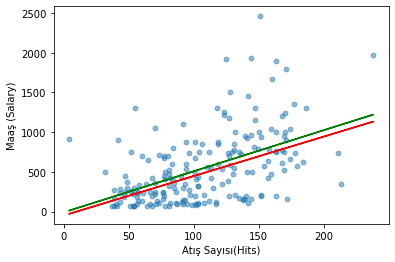

In [41]:
plt.scatter(X_train, y_train, alpha=0.5, s=23)
plt.plot(X_train, lm_pred, 'g')
plt.plot(X_train, y_pred, color='r')

plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş (Salary)")

In [42]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], svr_model.coef_[0][0])) 

y = -48.69756097561513 + 4.969512195122093 x


In [43]:
svr_model.predict([[91]])

array([403.52804878])

In [44]:
y_pred = svr_model.predict(X_test)

In [45]:
np.sqrt(mean_squared_error(y_test, y_pred))

459.0187960365147

In [46]:
svr_model

SVR(kernel='linear')

In [47]:
svr_model

SVR(kernel='linear')

In [48]:
svr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train,y_train)

In [49]:
pd.Series(svr_cv_model.best_params_)[0]

0.1

In [50]:
svr_tuned = SVR("linear", 
                C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)



In [51]:
y_pred = svr_tuned.predict(X_test)

In [52]:
np.sqrt(mean_squared_error(y_test, y_pred))

458.198966781116

In [53]:
np.sqrt(mean_squared_error(y_test, y_pred))

458.198966781116

# Non-Linear SVR

In [54]:
np.random.seed(3)

x_sim = np.random.uniform(2, 10, 145)
y_sim = np.sin(x_sim) + np.random.normal(0, 0.4, 145)

x_outliers = np.arange(2.5, 5, 0.5)
y_outliers = -5*np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_sim, x_outliers]))
x_sim = np.concatenate([x_sim, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim, y_outliers])[x_sim_idx]

In [55]:

from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(np.sin(x_sim[:, np.newaxis]), y_sim)
ols_pred = ols.predict(np.sin(x_sim[:, np.newaxis]))

from sklearn.svm import SVR
eps = 0.1
svr = SVR('rbf', epsilon = eps)
svr.fit(x_sim[:, np.newaxis], y_sim)
svr_pred = svr.predict(x_sim[:, np.newaxis])

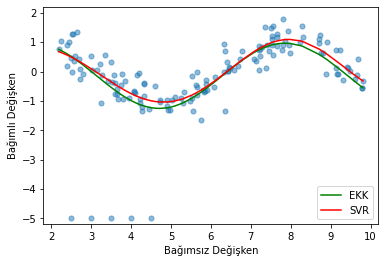

In [56]:
plt.scatter(x_sim, y_sim, alpha=0.5, s=26)
plt_ols, = plt.plot(x_sim, ols_pred, 'g')
plt_svr, = plt.plot(x_sim, svr_pred, color='r')
plt.xlabel("Bağımsız Değişken")
plt.ylabel("Bağımlı Değişken")
plt.ylim(-5.2, 2.2)
plt.legend([plt_ols, plt_svr], ['EKK', 'SVR'], loc = 4);

In [57]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [58]:
svr_rbf = SVR("rbf").fit(X_train, y_train)

In [59]:
y_pred = svr_rbf.predict(X_test)

In [60]:
np.sqrt(mean_squared_error(y_test, y_pred))

460.0032657244849

In [61]:
svr_rbf

SVR()

In [62]:
svr_params = {"C": [0.01, 0.1,0.4,5,10,20,30,40,50]}
svr_cv_model = GridSearchCV(svr_rbf,svr_params, cv = 10)
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.4, 5, 10, 20, 30, 40, 50]})

In [63]:
pd.Series(svr_cv_model.best_params_)[0]

50

In [64]:
svr_tuned = SVR("rbf", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, 
                                                                        y_train)


In [65]:
y_pred = svr_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

428.00406888095694

# MLP

In [122]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [123]:
from sklearn.preprocessing import StandardScaler

In [124]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [125]:
X_train_scaled = scaler.transform(X_train)

In [126]:
X_test_scaled = scaler.transform(X_test)

In [127]:
from sklearn.neural_network import MLPRegressor

In [128]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train_scaled, y_train)

In [129]:
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [130]:
mlp_model.n_layers_

4

In [131]:
mlp_model.hidden_layer_sizes

(100, 20)

In [132]:
y_pred = mlp_model.predict(X_test_scaled)

In [133]:
np.sqrt(mean_squared_error(y_test, y_pred))

527.4270090447499

In [134]:
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [135]:
mlp_params = {'alpha': [0.1, 0.01,0.02,0.005],
             'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
             'activation': ['relu','logistic']}

In [136]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10)

In [137]:
mlp_cv_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=MLPRegressor(hidden_layer_sizes=(100, 20)),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(20, 20), (100, 50, 150),
                                                (300, 200, 150)]})

In [138]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50, 150)}

In [139]:
mlp_tuned = MLPRegressor(alpha = 0.02, hidden_layer_sizes = (100,50,150))

In [140]:
mlp_tuned.fit(X_train_scaled, y_train)

MLPRegressor(alpha=0.02, hidden_layer_sizes=(100, 50, 150))

In [141]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [142]:
np.sqrt(mean_squared_error(y_test, y_pred))

361.7773902246188

# CART

In [143]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [144]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [145]:
cart_model = DecisionTreeRegressor(min_samples_split = 2)

In [146]:
?cart_model

Type:        DecisionTreeRegressor
String form: DecisionTreeRegressor()
File:        c:\anaconda3\lib\site-packages\sklearn\tree\_classes.py
Docstring:  
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"mse", "friedman_mse", "mae"}, default="mse"
    The function to measure the quality of a split. Supported criteria
    are "mse" for the mean squared error, which is equal to variance
    reduction as feature selection criterion and minimizes the L2 loss
    using the mean of each terminal node, "friedman_mse", which uses mean
    squared error with Friedman's improvement score for potential splits,
    and "mae" for the mean absolute error, which minimizes the L1 loss
    using the median of each terminal node.

    .. versionadded:: 0.18
       Mean Absolute Error (MAE) criterion.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose

In [147]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor()

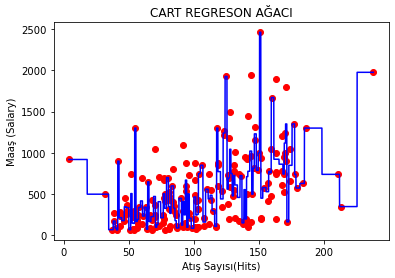

In [148]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  
plt.title('CART REGRESON AĞACI')  
plt.xlabel('Atış Sayısı(Hits)') 
plt.ylabel('Maaş (Salary)') ;

In [151]:
!pip install skompiler

  Created wheel for skompiler: filename=SKompiler-0.5.5-py3-none-any.whl size=57151 sha256=14a35d3de5ab090662c13bbe2c30a0acd46ed9c961e7e00236c740ea01d48662
  Stored in directory: c:\users\tcttn\appdata\local\pip\cache\wheels\1a\57\a0\4940fe9698fe2ec1e619757c6d2258b1026cb24b88562811ed
Successfully built skompiler


In [152]:
from skompiler import skompile

In [176]:
import astor
print(skompile(cart_model.predict).to('python/code'))

ModuleNotFoundError: No module named 'astor'

## Prediction

In [160]:
x = [91]

In [161]:
(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)

345.2011551724138

In [162]:
cart_model.predict(X_test)[0:5]

array([ 725.    , 1230.    ,  725.    ,  504.1665,   67.5   ])

In [163]:
cart_model.predict([[91]])

array([125.])

In [164]:
y_pred =cart_model.predict(X_test)

In [165]:
np.sqrt(mean_squared_error(y_test, y_pred))

468.49579052913884

## Model Tuning

In [166]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [167]:
np.sqrt(mean_squared_error(y_test, y_pred))

468.49579052913884

In [168]:
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}

In [169]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)

In [170]:
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [171]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 76}

In [172]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 37)

In [173]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=37)

In [174]:
y_pred = cart_tuned.predict(X_test)

In [175]:
np.sqrt(mean_squared_error(y_test, y_pred))

434.2326688144208

# Bagged Trees Regression

In [177]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [178]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [179]:
bag_model.n_estimators

10

In [180]:
bag_model.estimators_

[DecisionTreeRegressor(random_state=1686320658),
 DecisionTreeRegressor(random_state=2106270115),
 DecisionTreeRegressor(random_state=604160287),
 DecisionTreeRegressor(random_state=1818112300),
 DecisionTreeRegressor(random_state=1144551074),
 DecisionTreeRegressor(random_state=1634764234),
 DecisionTreeRegressor(random_state=820974251),
 DecisionTreeRegressor(random_state=1387516839),
 DecisionTreeRegressor(random_state=2009973545),
 DecisionTreeRegressor(random_state=1391412095)]

In [181]:
bag_model.estimators_samples_

[array([175, 142,  67, 175,  63,  74,  42, 124, 165, 168,  50, 105,  87,
        122,  11,  42, 155, 191,  83, 175,  96,  59,  71,  70, 172, 113,
        119, 169, 192,   7, 104, 126, 179, 153,  50,  43,  12,  24,  42,
        170, 173, 169,  43,  89,  91, 196,  17,  52,  67, 125, 128,  33,
        180, 143, 149,  64, 144, 191,  65,   9,  87, 180,  83, 137, 130,
        103, 137, 151, 119, 174, 105, 133,  65,  16,  41,   5,  18, 177,
        140,  36, 126, 142,  57, 150, 172,  32, 123,  64, 168,   0, 126,
          8, 116,  85,  19,   7,  28, 194, 146, 143, 153,  34,  19,  91,
        137, 172,  11,  65,  48,  75,  42,  65, 108, 184, 174,  81, 125,
         27,  12,  71,  98, 186,   5,  92, 178, 162,  12,  28, 138,  65,
         22, 117, 160, 145, 177, 155, 164, 184, 125,  98,  40, 131, 159,
        188, 193,  87,  71, 147, 196, 184,  76, 139,  22,  33,  48, 105,
         86, 166, 158,  57, 179, 139, 177,  31,  29, 142,  72, 139,  47,
         74,   6, 116, 118,  76,  80, 143, 144,  76

In [182]:
bag_model.estimators_features_

[array([18, 16,  6,  7, 10,  8,  3, 11,  2,  1, 11,  8,  6,  4,  1, 14, 16,
        15, 18]),
 array([ 3, 14,  7, 11,  0, 18,  4,  8, 12,  4, 14, 14,  4, 14, 13,  4,  4,
         6, 15]),
 array([ 4, 15, 16,  9, 11, 18,  5, 14,  6, 17,  3, 12,  2,  5,  2,  4,  0,
         9, 14]),
 array([12,  9,  7, 13, 18, 11, 13,  0,  4, 13, 10,  1,  8, 17, 14, 13, 13,
        13, 11]),
 array([ 2, 15,  3, 14,  2,  5,  5, 12, 15, 18,  1,  1, 18,  8, 12,  7,  0,
        18,  3]),
 array([10, 18,  2,  1,  8, 17,  1, 14, 15, 13, 13,  0, 15, 13, 13, 14, 15,
        18,  1]),
 array([11, 16,  7,  6, 17,  9, 14,  4,  9,  9,  2,  5, 17,  3, 10, 11,  6,
        11,  8]),
 array([ 7,  7, 17,  2,  7,  5, 10, 13,  9,  5, 16, 18, 17,  8, 13, 16, 12,
         6, 12]),
 array([ 9,  0, 12,  8,  0, 16,  0,  3,  5, 15, 17, 10,  2,  9,  5,  0, 11,
        14,  7]),
 array([17, 11, 17,  1, 13,  9, 15,  8, 15,  7,  4,  4,  2, 11, 17, 11, 15,
        13, 10])]

In [183]:
bag_model.estimators_[1]

DecisionTreeRegressor(random_state=2106270115)

## Prediction

In [184]:
y_pred = bag_model.predict(X_test)

In [185]:
np.sqrt(mean_squared_error(y_test, y_pred))

320.59006280796274

In [186]:
iki_y_pred = bag_model.estimators_[1].fit(X_train, y_train).predict(X_test)

In [187]:
np.sqrt(mean_squared_error(y_test, iki_y_pred))

524.931629622878

In [188]:
yedi_y_pred = bag_model.estimators_[4].fit(X_train, y_train).predict(X_test)

In [189]:
np.sqrt(mean_squared_error(y_test, yedi_y_pred))

434.9171940758065

# Model Tuning

In [190]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [191]:
bag_params = {"n_estimators": range(2,20)}

In [192]:
bag_cv_model = GridSearchCV(bag_model, bag_params, cv = 10)

In [193]:
bag_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=BaggingRegressor(bootstrap_features=True),
             param_grid={'n_estimators': range(2, 20)})

In [194]:
bag_cv_model.best_params_

{'n_estimators': 6}

In [195]:
bag_tuned = BaggingRegressor( n_estimators = 14, random_state = 45)

In [196]:
bag_tuned.fit(X_train, y_train)

BaggingRegressor(n_estimators=14, random_state=45)

In [197]:
y_pred = bag_tuned.predict(X_test)

In [198]:
np.sqrt(mean_squared_error(y_test, y_pred))

347.50463424981314

# Random Forests

In [199]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [200]:
from sklearn.ensemble import RandomForestRegressor

In [201]:
rf_model = RandomForestRegressor(random_state = 42)

In [202]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Prediction

In [203]:
rf_model.predict(X_test)[0:5]

array([ 740.62167,  895.99497, 1184.695  ,  139.65167,  634.75833])

In [204]:
y_pred = rf_model.predict(X_test)

In [205]:
np.sqrt(mean_squared_error(y_test, y_pred))

345.00286717448006

## Model Tuning

In [206]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500, 1000, 2000]}

In [207]:
rf_model = RandomForestRegressor(random_state = 42)

In [208]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1)

In [209]:
rf_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 500, 1000, 2000]})

In [210]:
rf_cv_model.best_params_

{'max_depth': 8, 'max_features': 3, 'n_estimators': 100}

In [211]:
rf_tuned = RandomForestRegressor(max_depth  = 8, 
                                 max_features = 3, 
                                 n_estimators =200)

In [212]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, max_features=3, n_estimators=200)

In [213]:
y_pred = rf_tuned.predict(X_test)

In [214]:
np.sqrt(mean_squared_error(y_test, y_pred))

342.83450506167225

In [215]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

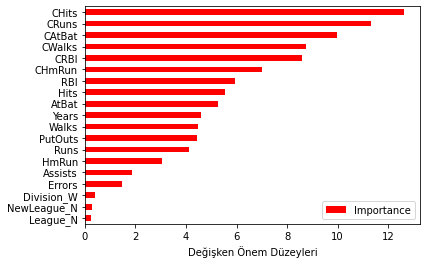

In [216]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# Gradient Boosting Machines

In [217]:
from sklearn.ensemble import GradientBoostingRegressor

In [218]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor()

## Prediction

In [221]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

344.4009657195817

## Model Tuning

In [222]:
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75],
}

In [223]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 10.4min finished


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 50, 100],
                         'n_estimators': [200, 500, 1000, 2000],
                         'subsample': [1, 0.5, 0.75]},
             verbose=2)

In [224]:
gbm_cv_model.best_params_

{'learning_rate': 0.01,
 'max_depth': 50,
 'n_estimators': 2000,
 'subsample': 0.5}

In [225]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1,  
                                      max_depth = 5, 
                                      n_estimators = 200, 
                                      subsample = 0.5)

gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [226]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

365.23332224168263

In [227]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

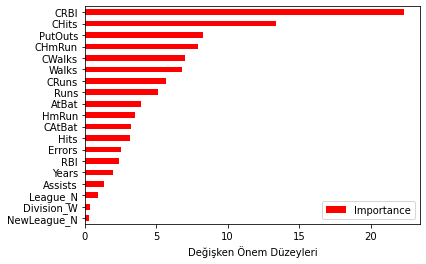

In [228]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# XGBoost

In [229]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [230]:
#!pip install xgboost

In [231]:
import xgboost as xgb

In [232]:
DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data = X_test, label = y_test)

In [233]:
from xgboost import XGBRegressor

In [234]:
xgb_model = XGBRegressor().fit(X_train, y_train)

## Prediction

In [235]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

355.4651481224188

## Model Tuning

In [236]:
xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [237]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}


In [238]:
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)


xgb_cv.fit(X_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 832 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 1562 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done 2058 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2585 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:  1.7min finished


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_par

In [239]:
xgb_cv.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 500}

In [240]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.9, 
                         learning_rate = 0.01, 
                         max_depth = 5, 
                         n_estimators = 1000) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

In [241]:
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

360.4180929981069

# Light GBM

In [242]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [ ]:
!pip install lightgbm

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
#conda install -c conda-forge lightgbm

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

## Prediction

In [ ]:
y_pred = lgbm_model.predict(X_test, 
                            num_iteration = lgbm_model.best_iteration_)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

## Model Tuning

In [ ]:
lgbm_model

In [ ]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)

In [ ]:
lgbm_cv_model.fit(X_train, y_train)

In [ ]:
lgbm_cv_model.best_params_

In [ ]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, 
                           max_depth = 7, 
                           n_estimators = 40,
                          colsample_bytree = 0.6)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

In [ ]:
y_pred = lgbm_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

# CatBoost

In [ ]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)

##  Prediction

In [ ]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

## Model Tuning

In [ ]:
catb_grid = {
    'iterations': [200,500,1000,2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [3,4,5,6,7,8] }

In [ ]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs = -1, verbose = 2)

In [ ]:
catb_cv_model.fit(X_train, y_train)

In [ ]:
catb_cv_model.best_params_

In [ ]:
catb_tuned = CatBoostRegressor(iterations = 200, 
                               learning_rate = 0.01, 
                               depth = 8)

catb_tuned = catb_tuned.fit(X_train,y_train)

In [ ]:
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))